## Time Series Assignment

* Student: **Perakis Georgios**
* Code: **DS3616014**
* Contact: **gperakis[at]aueb.gr**

## Description

The data you will have to analyze are in the eclass in the **excel data-assignment.xls**
file. The **dependent variables** for which you will construct the models you are asked
for, are the **returns** of four investment vechicles **(Y1, Y2, Y3, Y4)** for the period **1/1991 - 12/2005**.

The **independent variables** you will use in the models refer to **monthly** values/returns for the variables:
* x1 = RUS-Rf
* x2 = RUS (-1) -Rf (-1) lagged Russel index
* x3 = MXUS-Rf
* x4 = MEM- Rf
* x5 = SMB
* x6 = HML
* x7 = MOM
* x8 = SBGC-Rf
* x9 = SBWG-Rf
* x10 = LHY-Rf
* x11 = DEFSPR
* x12 = FRSI-Rf
* x13 = GSCI-Rf
* x14 = VIX

for the period **1/1991 - 12/2005**.

Analyze dependent variables based on data for the period 1/1991 - 12/2004 **[You will not use the data for the period 1/2005 - 12/2005]**:

1. Construct an appropriate **time series** model (AR, MA, ARMA).
2. Develop an appropriate **regression** model
  * In case of **autocorrelation** problem of **regression residuals**, correct the autocorrelation problem (using time series AR, MA, ARMA models).
  * In case of **heteroscedasticity** problem of **regression residuals**, correct the
    heteroskedasticity problem (using time-varying ARCH, GARCH models).
3. Write the models you have found at questions (1) - (2). Assess the **goodness of fit** of these models based on the **AIC and BIC** information criteria.
4. Based on the estimated models of questions (1) - (2), **construct forecasts** of the analyzed series for the period **1/2005 - 12/2005**, and **evaluate the forecasts** you have found by using two evaluation criteria:
  * the mean square prediction error
  * the Hit ratio (indicates the percentage of predictions that correctly evaluate the sign of the actual value of the dependent variable.)
  
Each student will have to analyze **two only dependent variables**

### Load Libraries

In [ ]:
# loads the library urca, which contains the command ur.df() 
# and applies Unit-Root Testing based on Dickey-Fuller test 
library(urca)
library(tseries)

In [5]:
# Importing data into R can be carried out in various ways. Below, the command read.table is used:
data_all = read.table('/home/socital1/Desktop/george/AUEB/TimeSeries/Assignment-February-2018/Data-Assignment-Feb-2018.txt')

In [6]:
head(data_all)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18
0.02058,0.02058,0.00468,0.01468,0.04568,0.01745,0.02313,0.07273,0.0389,-0.0181,-0.0946,0.00575,0.01937,0.01868,0.0001,0.00004,-0.10389,-0.0547
0.03503,0.02583,0.03903,0.03623,0.06346,0.04568,0.09344,0.13201,0.0397,-0.0056,-0.1147,0.00144,-0.00486,0.10639,-0.0014,-0.01039,0.00866,0.0032
0.04458,0.02168,0.02878,0.06348,0.02225,0.06346,-0.06591,0.03187,0.0395,-0.0124,-0.0407,0.00253,-0.04193,0.02621,-0.0024,0.03228,0.03201,-0.0435
0.00865,0.01325,0.02585,0.04855,-0.00581,0.02225,0.00371,-0.00174,0.0037,0.0170,-0.0224,0.00790,0.01053,0.01619,-0.0008,0.01107,0.01764,0.0136
0.01507,0.00227,0.02377,0.00887,0.03258,-0.00581,0.00577,0.06795,-0.0037,-0.0052,0.0282,-0.00023,-0.00601,-0.00780,-0.0011,0.00235,-0.00524,-0.0231
-0.00064,-0.00924,-0.00234,0.01246,-0.05360,0.03258,-0.07982,-0.04322,0.0006,0.0102,0.0010,-0.00499,-0.01526,0.01826,-0.0011,0.01085,-0.02869,0.0362


### Question 1 

In [3]:
y1 <- data_all$V1

###### Let create a time series object using the function “ts” from a vector - single time-series or a matrix - multivariate time-series. The data consist of the Y1 monthly returns from 1/1991 - 12/2004, 

In [7]:
j1 = ts(y1, frequency=12, start = c(1991, 1), end = c(2004, 12))

In [8]:
head(y1)

[1]  0.02058  0.03503  0.04458  0.00865  0.01507 -0.00064

In [9]:
j1

          Jan      Feb      Mar      Apr      May      Jun      Jul      Aug
1991  0.02058  0.03503  0.04458  0.00865  0.01507 -0.00064  0.02146  0.01603
1992  0.03512  0.01805  0.00244 -0.00016  0.01523 -0.00714  0.01809 -0.00539
1993  0.02073  0.01090  0.02813  0.01244  0.02339  0.02362  0.01831  0.02673
1994  0.02248 -0.00837 -0.01808 -0.00920  0.00323 -0.00083  0.00986  0.02070
1995 -0.00720  0.00815  0.01160  0.01610  0.01214  0.02008  0.02735  0.01746
1996  0.02469  0.00813  0.01031  0.03531  0.02619 -0.00250 -0.02523  0.01839
1997  0.02741  0.00595 -0.02085 -0.00547  0.03968  0.02269  0.03433 -0.00096
1998 -0.01142  0.02826  0.02570  0.00545 -0.02498 -0.00555 -0.01213 -0.09108
1999  0.01868 -0.01712  0.02765  0.04121  0.00332  0.03232  0.00124 -0.00425
2000  0.00167  0.05677  0.00440 -0.03334 -0.02430  0.03191 -0.01117  0.03285
2001  0.02974 -0.02613 -0.01948  0.01626  0.00894 -0.00012 -0.01125 -0.00691
2002  0.00303 -0.00848  0.01761  0.00134 -0.00104 -0.02079 -0.03000  0.00393

Since we are talking about **returns** we **don't** need to take to logs and the differences of the logs

### The time series plot and the histogram for the Y1 data is given by

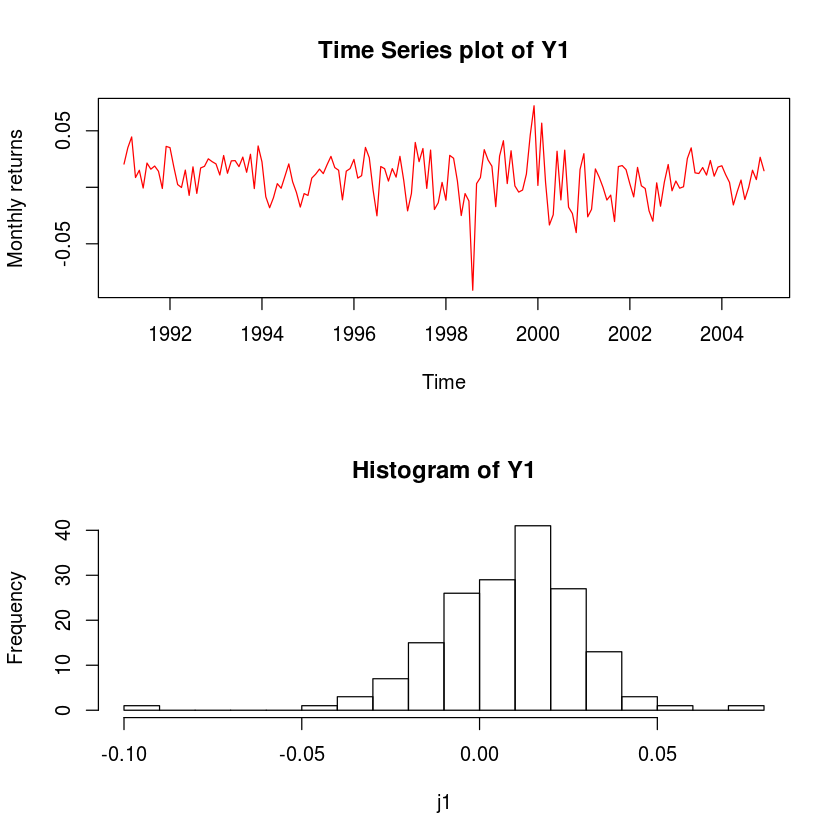

In [65]:
# set up the graphics
par(mfrow=c(2, 1))      

plot(j1, type="l", col='red',
     lwd=1, main="Time Series plot of Y1", 
     ylab="Monthly returns")

hist(j1, nclass=20, main="Histogram of Y1")

#### The autocorrelation and partial autocorrelation plots are useful to examine if there is dependence between lagged values of the analyzed series

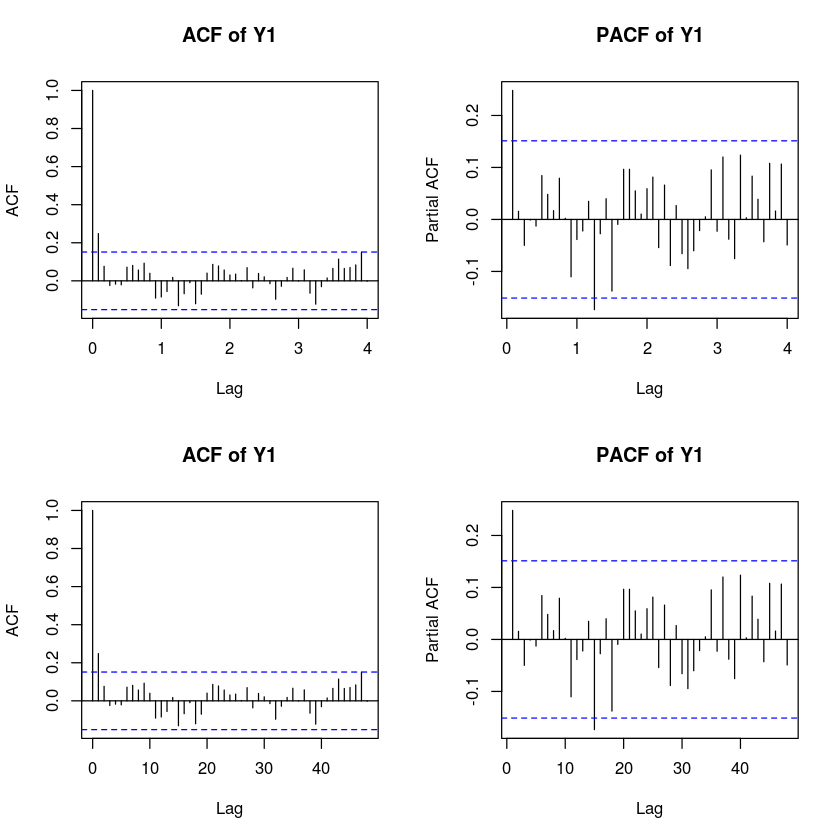

In [68]:
# Create Autocorrelation and partial autocorrelation plots
par(mfrow=c(2, 2)) # set up the graphics  

acf(j1, 48, main="ACF of Y1")        # autocorrelation function plot 
pacf(j1, 48, main="PACF of Y1")    # partial autocorrelation function 

acf(ts(j1, freq=1), 48, main="ACF of Y1")        # autocorrelation function plot 
pacf(ts(j1, freq=1), 48, main="PACF of Y1") 

We must note that in the autocorrelation plots presented above, the **dashed lines** are the approximate **two standard error confidence bounds** computed by ± 1,96* (1 / T), where T is the number observations.

If the autocorrelation is within these bounds, it is not significantly different from zero at (approximately)
5% level of significance.

So we conclude  that:

* From **ACF plot** we observe that we have **autocorrelation for lag=1**. We must check an autoregressive model for lag=1. **(AR(1))**
* From **PACF plot** we observe that we also have **partial autocorrelation for lag=1 and lag=15**. We must check a moving average model for lag=1 and lag=15. **(MA(1) and MA(15))**

### Running Tests for Y1

The Box.test() command can be used to compute the **Box-Pierce** or the **Ljung-Box** test statistic for
examining the **null hypothesis** that the **autocorrelations** of a given time series **are zero**

* x is the analyzed time series
* lag denotes the number of lags at which the statistic will be computed
* type determines the Box-Pierce or the Ljung-Box test statistic

In [69]:
# Box-Pierce test
res1 <- Box.test(x=j1, lag=48, type="Box-Pierce")
res1
# Ljung-Box test
res2 <- Box.test(x=j1, lag=48, type="Ljung-Box")
res2


	Box-Pierce test

data:  j1
X-squared = 46.52, df = 48, p-value = 0.5336



	Box-Ljung test

data:  j1
X-squared = 54.496, df = 48, p-value = 0.2411


Both Ljung-Box test and Box-Pierce test cannot reject the Null Hypothesis.

### UNIT ROOT TESTING

First, we can fit an **autoregressive time series model** to the Y1 data, by selecting the complexity of the
model **based on AIC**. Then, we perform an **augmented Dickey-Fuller test** of unit root, based on a model
with constant and trend (see figure 2, time series plot for the J&J series):

In [71]:
# Unit root testing for the Y1 series
# Fits an autoregressive model, and selects the best AR order based on AIC
m1 = ar(j1)
m1
m11 <- ur.df(j1, type="drift", lags=1)
m11
summary(m11)


Call:
ar(x = j1)

Coefficients:
     1  
0.2481  

Order selected 1  sigma^2 estimated as  0.0003725


############################################################### 
# Augmented Dickey-Fuller Test Unit Root / Cointegration Test # 
############################################################### 

The value of the test statistic is: -7.7644 30.1458 



############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.094311 -0.011248  0.001782  0.012054  0.054646 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.006234   0.001711   3.644  0.00036 ***
z.lag.1     -0.743140   0.095711  -7.764 8.58e-13 ***
z.diff.lag  -0.017118   0.078070  -0.219  0.82672    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01936 on 163 degrees of freedom
Multiple R-squared:  0.3807,	Adjusted R-squared:  0.3731 
F-statistic: 50.11 on 2 and 163 DF,  p-value: < 2.2e-16


Value of test-statistic is: -7.7644 30.1458 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.46 -2.88 -2.57
phi1  6.52  4.63  3.81


* The Critical Value (CV) for 5% is -2.88
* The value of the test statistic for lag=1 with drift is: -7.7644
* Both Intercept and z.lag.1 are statistically significant

Obviously, the null hypothesis of non-stationarity for the Y1 series is rejected. Therefore the returns of Y1 seem to be a stationary process.

In [72]:
adf.test(y1, k=1)

Warning message in adf.test(y1, k = 1):
“p-value smaller than printed p-value”


	Augmented Dickey-Fuller Test

data:  y1
Dickey-Fuller = -8.3271, Lag order = 1, p-value = 0.01
alternative hypothesis: stationary
